In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data-used-car-pricing.csv')

In [5]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,4,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:
# Replace '?' with NaN
df.replace(to_replace='?', value=np.NaN, inplace=True)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,4,2,NaN,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [13]:
# Evaluate missing data
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
False    204
Name: Unnamed: 0, dtype: int64

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
Fals

In [21]:
# Deal with missing data
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

In [23]:
# Check values present in a column
df['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

In [25]:
# Drop rows which do not have price data
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,2,164,audi,gas,std,four,sedan,fwd,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,3,2,164,audi,gas,std,four,sedan,4wd,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,4,4,2,122.0,audi,gas,std,two,sedan,fwd,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [27]:
# Convert datatypes
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')

In [30]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,index,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476
1,1,1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421
2,2,2,2,164,audi,gas,std,four,sedan,fwd,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667
3,3,3,2,164,audi,gas,std,four,sedan,4wd,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556
4,4,4,2,122.0,audi,gas,std,two,sedan,fwd,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,12.368421


In [31]:
# Normalize values
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()

In [41]:
# Bin values
df['horsepower'] = df['horsepower'].astype('float')
bins_horsepower = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins_horsepower, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111.0,Low
1,154.0,Medium
2,102.0,Low
3,115.0,Low
4,110.0,Low
5,110.0,Low
6,110.0,Low
7,140.0,Medium
8,101.0,Low
9,101.0,Low


<BarContainer object of 3 artists>

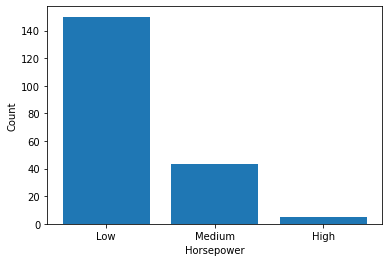

In [43]:
import matplotlib.pyplot as plt
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.bar(group_names, df['horsepower-binned'].value_counts())